In [1]:
!pip install pycaret
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s

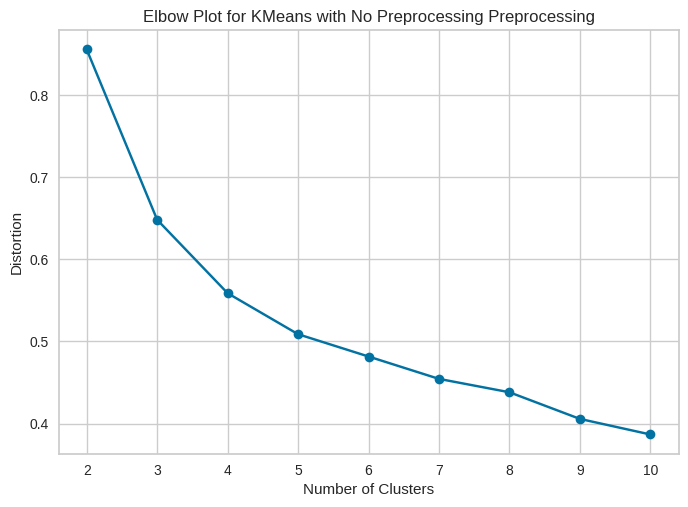

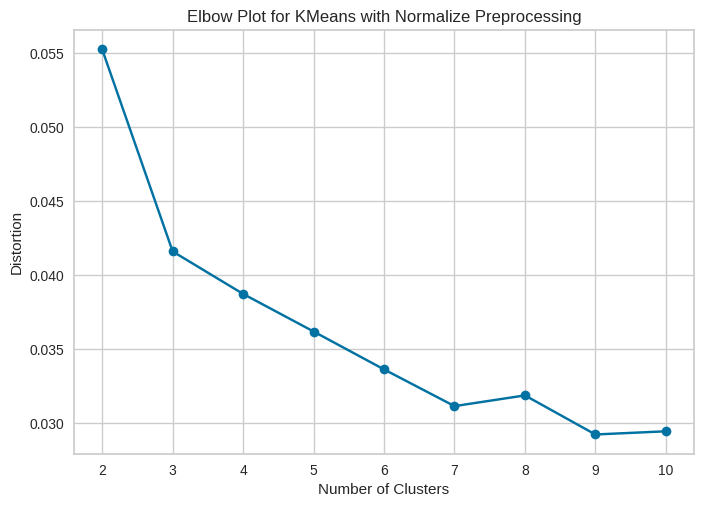

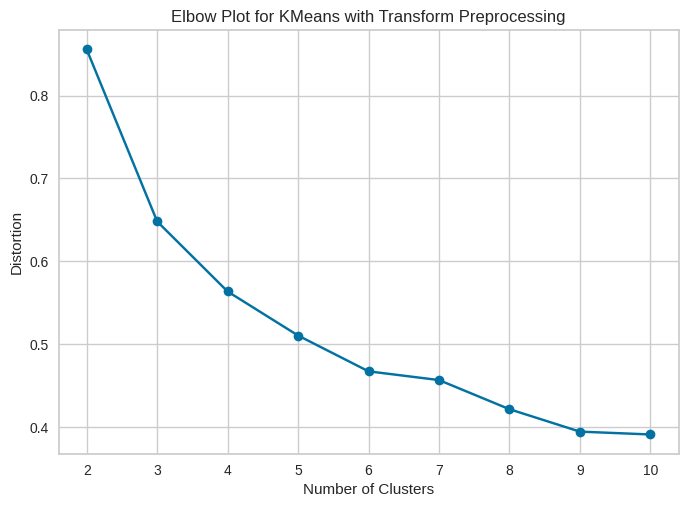

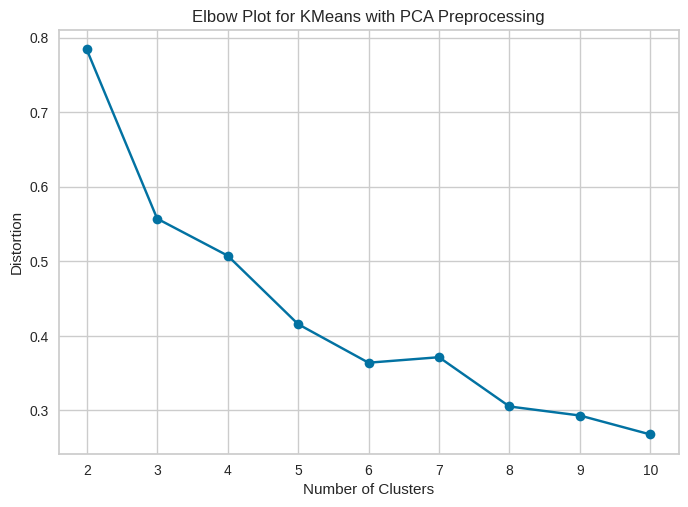

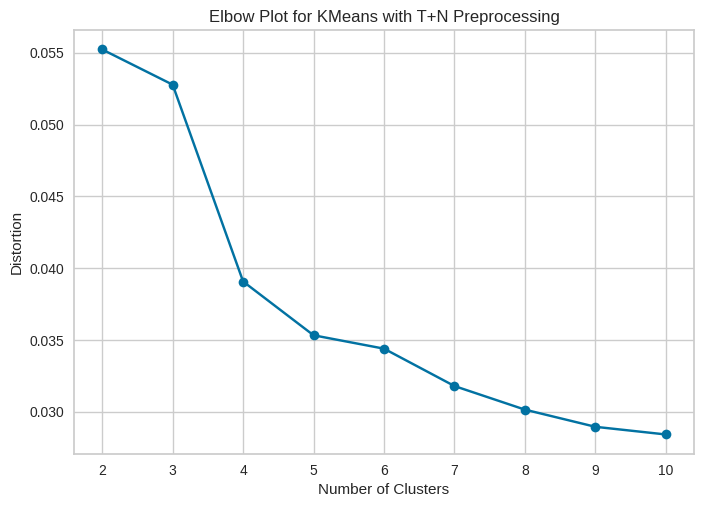

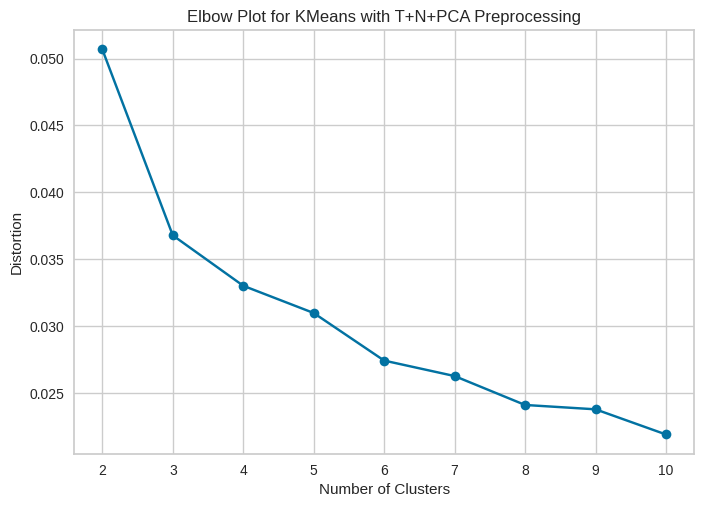

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score


# Load wine dataset
wine = load_iris()
X = wine.data

# Define preprocessing approaches
preprocessing = {
    'No Preprocessing': lambda x: x,
    'Normalize': normalize,
    'Transform': lambda x: x,  # Replace with your own transformation function
    'PCA': lambda x: PCA(n_components=2).fit_transform(x),
    'T+N': lambda x: normalize(x),
    'T+N+PCA': lambda x: PCA(n_components=2).fit_transform(normalize(x))
}

# Define the number of clusters for the elbow plot
clusters_range = range(2, 11)

# Generate elbow plots for KMeans, Hierarchical, and Birch
for model_name, model in [('KMeans', KMeans()), ('Hierarchical', linkage), ('Birch', Birch())]:
    for preprocess_column, preprocess_func in preprocessing.items():
        X_preprocessed = preprocess_func(X)

        if model_name == 'KMeans':
            distortions = []
            for cluster in clusters_range:
                kmeans = KMeans(n_clusters=cluster)
                kmeans.fit(X_preprocessed)
                distortions.append(sum(np.min(cdist(X_preprocessed, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_preprocessed.shape[0])

            # Plot the elbow plot for KMeans
            plt.plot(clusters_range, distortions, marker='o')
            plt.title(f'Elbow Plot for {model_name} with {preprocess_column} Preprocessing')
            plt.xlabel('Number of Clusters')
            plt.ylabel('Distortion')
            plt.show()



In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from pycaret.clustering import *

# Load wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Define preprocessing approaches using PyCaret
preprocessing_pycaret = {
    'No Preprocessing': None,
    'Normalize': 'normalize',
    'Transform': 'transformation',
    'PCA': 'pca',
    'T+N': ['normalize', 'transformation'],
    'T+N+PCA': ['normalize', 'transformation', 'pca']
}

# Define clustering algorithms using PyCaret with corresponding model names
clustering_algorithms = {
    'kmeans': 'K-Means',
    'hclust': 'Hierarchical',
    'birch': 'Birch'
}

# Create DataFrames to store the results for each algorithm
index = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
columns = pd.MultiIndex.from_product([['No Preprocessing', 'Normalize', 'Transform', 'PCA', 'T+N', 'T+N+PCA'], ['c=3', 'c=4', 'c=5']], names=['Preprocessing', 'Clusters'])
results_df = pd.DataFrame(index=index, columns=columns)

# Perform clustering for each combination of preprocessing, algorithm, and clusters using PyCaret
for preprocess_column, preprocess_steps in preprocessing_pycaret.items():
    for algorithm, model_name in clustering_algorithms.items():
        for c in columns.get_level_values('Clusters').unique():
            # Setup PyCaret clustering
            setup(data, normalize=preprocess_steps, transformation=preprocess_steps, pca=preprocess_steps)

            # Create and evaluate the clustering model
            model = create_model(algorithm, num_clusters=int(c[-1]))
            prediction = assign_model(model)

            # Calculate clustering metrics
            silhouette_score_val = silhouette_score(data, prediction.Cluster)  # Change 'Label' to 'Cluster'
            calinski_harabasz_index_val = calinski_harabasz_score(data, prediction.Cluster)
            davies_bouldin_index_val = davies_bouldin_score(data, prediction.Cluster)

            # Update the results DataFrame with model name
            results_df.loc[:, (f'{model_name} - {preprocess_column}', c)] = [silhouette_score_val, calinski_harabasz_index_val, davies_bouldin_index_val]

# Save the results to a CSV file
results_df.to_csv('pycaret_results.csv', index=True)
print('PyCaret results saved to pycaret_results.csv')


,Description,Value
0,Session id,6801
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5404,497.4265,0.5584,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,6942
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5620,708.0867,0.5443,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4077
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5082,745.1974,0.5744,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7541
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5645,552.8518,0.5357,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7783
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5607,670.6260,0.5536,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4240
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5075,684.2226,0.5513,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2981
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5645,552.8518,0.5357,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4216
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5607,670.6260,0.5536,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7420
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5075,684.2226,0.5513,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7900
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2998,72.6537,1.3693,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2763
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2650,56.9477,1.8555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,6924
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1441,45.0219,1.8673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,215
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,6400
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,8924
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,8192
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,556
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7701
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,normalize
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2464
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2998,72.6537,1.3693,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4376
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2691,56.9590,1.8334,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,5669
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2571,47.0215,1.6243,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1346
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7038
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,3390
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2971
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,6132
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1608
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,transformation
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,960
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3013,73.1201,1.3609,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,3351
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2532,56.3069,1.8997,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4237
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2215,46.4081,1.8403,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,3124
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,3266
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2560
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2121
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7916
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,8609
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,pca
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1028
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3013,73.1201,1.3609,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2688
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2497,55.2813,1.6620,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,5375
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2176,46.4335,1.9451,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1955
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4089
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2760
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,8626
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2063
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,3050
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2296
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3008,73.1144,1.3599,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,7267
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2297,54.6310,1.6970,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1186
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2307,45.5279,1.6301,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,4781
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,8649
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,5131
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,2907
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2898,68.9693,1.3854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,1167
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2518,53.1404,1.7041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Description,Value
0,Session id,5330
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,"['normalize', 'transformation', 'pca']"
9,Transformation method,yeo-johnson


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2295,44.8019,1.8092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

PyCaret results saved to pycaret_results.csv
